## Examen data frames - Otras respuestas

In [1]:
import pandas as pd #lo primero es llamar a pandas
import numpy as np

In [2]:
df = pd.read_csv("../../data/run.csv", delimiter =",",decimal=".") 
df.head()

,Unnamed: 0,pulso.antes,pulso.despues,hace.deporte,fuma,genero,altura,peso,tipo.actividad
0,1,48,54,no,si,H,68.0,150,nula
1,2,54,56,no,si,H,69.0,145,moderada
2,3,54,50,no,no,H,69.0,160,moderada
3,4,58,70,si,no,H,72.0,145,moderada
4,5,58,58,no,no,H,66.0,135,intensa


## Rocio Cuesta Pedraz

In [5]:
## 3. Calcula el porcentaje medio de variación del pulso por minuto entre antes y después 
#de hacer ejercicio y compara el valor de los que hacen ejercicio habitualmente y los que no. 
#¿Observas mucha diferencia?

df2= df[["hace.deporte","pulso.antes","pulso.despues"]] #Para solo traerme estas columnas

df2.groupby("hace.deporte").mean()

,pulso.antes,pulso.despues
hace.deporte,,
no,72.421053,72.315789
si,73.600000,92.514286


In [6]:
## 4. Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer ejercicio  
#para los estudiantes que hacen ejercicio habitualmente y compara el valor de los hombres con el de las 
#mujeres. ¿Observas mucha diferencia?

hacedeporte =  df['hace.deporte']=="si" #Para crear un objeto abstracto de solo los que hacen deporte = si

hacedeportedf = df[hacedeporte] #Para crear nuevo dataframe con solo esos datos

hacedeportedf2= hacedeportedf[["genero","pulso.antes","pulso.despues"]] #Para traerme solo estas columnas

hacedeportedf2.groupby("genero").mean()


,pulso.antes,pulso.despues
genero,,
H,70.250000,83.208333
M,80.909091,112.818182


In [7]:
## 5.Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer 
#ejercicio para los estudiantes que no hacen ejercicio habitualmente y compara el valor de los 
#fumadores con los no fumadores. ¿Observas mucha diferencia?

nohacedeporte =  df['hace.deporte']=="no"

nohacedeportedf = df[nohacedeporte]

nohacedeportedf2=nohacedeportedf[["fuma","pulso.antes","pulso.despues"]]

nohacedeportedf2.groupby("fuma").mean()

,pulso.antes,pulso.despues
fuma,,
no,71.707317,71.512195
si,74.250000,74.375000


In [15]:
## 6. Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer 
#ejercicio de todos los estudiantes según el tipo de actividad física que realizan. 
#¿Observas alguna diferencia?

df3=df[["tipo.actividad","pulso.antes","pulso.despues"]]

df3.groupby("tipo.actividad").mean()



,pulso.antes,pulso.despues
tipo.actividad,,
intensa,71.571429,72.190476
moderada,72.737705,82.786885
nula,48.000000,54.000000
suave,79.555556,82.222222


## Víctor Caravaca Hernández

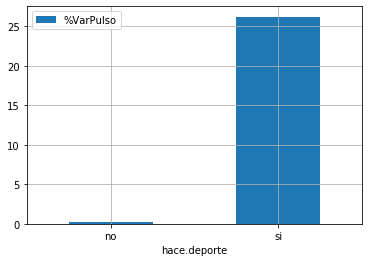

In [11]:
## 3. Calcula el porcentaje medio de variación del pulso por minuto entre antes y después 
#de hacer ejercicio y compara el valor de los que hacen ejercicio habitualmente y los que no. 
#¿Observas mucha diferencia?

#primero creo una columna nueva con el porcentaje de variación de cada muestra.
df['%VarPulso'] = df['pulso.despues']*100/df['pulso.antes']-100
df.head()

#Ahora caclulamos la media de la variación del pulso entre los que Sí y No  hacen deporte
dfVarPulso = df.groupby('hace.deporte').aggregate({
    '%VarPulso': np.mean
})
dfVarPulso
#Generamos gráfico para ver las diferencias.
dfVarPulso.plot(kind='bar', rot=0, grid=True)

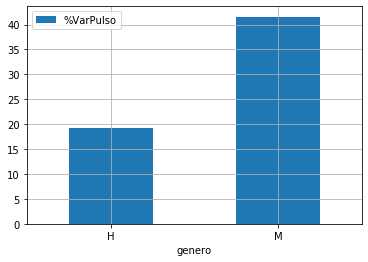

In [16]:
## 4. Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer ejercicio  
#para los estudiantes que hacen ejercicio habitualmente y compara el valor de los hombres con el de las 
#mujeres. ¿Observas mucha diferencia?

#Primero creamos una copia del df con todas las filas
#eliminadas de las personas que NO hacen deporte

df2 = df.drop(df[df['hace.deporte']=='no'].index)

#Ahora calculamos la media de la variación del pulso por genero

dfVarPulsoGenero = df2.groupby('genero').aggregate({
    '%VarPulso': np.mean
})
dfVarPulsoGenero

#Generamos gráfico para mostras la varicación de pulso entre generos
#que hacen deporte
dfVarPulsoGenero.plot(kind='bar', rot=0, grid=True)

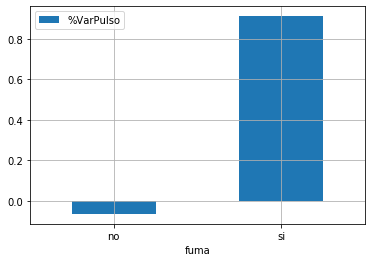

In [17]:
## 5.Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer 
#ejercicio para los estudiantes que no hacen ejercicio habitualmente y compara el valor de los 
#fumadores con los no fumadores. ¿Observas mucha diferencia?

#Creamos un nuevo DF eliminando las columnas de gente que Sí hace deporte

df3 = df.drop(df[df['hace.deporte']=='si'].index)
df3.head()

#Ahora calculamos la media de variacón de pulso entre la gente
#que si/no fuma mas No hace deporte
dfVarPulsoFumaNoDep = df3.groupby('fuma').aggregate({
    '%VarPulso': np.mean
})
dfVarPulsoFumaNoDep

#Generamos gráfico para visualizar mejor los datos
dfVarPulsoFumaNoDep.plot(kind='bar', rot=0, grid=True)

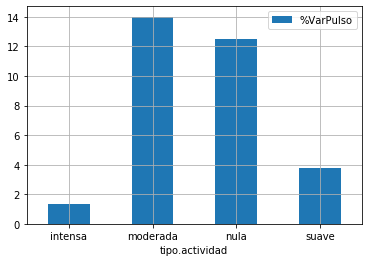

In [18]:
## 6. Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer 
#ejercicio de todos los estudiantes según el tipo de actividad física que realizan. 
#¿Observas alguna diferencia?

#Calculamos la media de variación de pulso de todos agrupando 
# por tipo de actividad
dfVarPulsoActividad = df.groupby('tipo.actividad').aggregate({
    '%VarPulso': np.mean
})
dfVarPulsoActividad

#Generamos gráfico para una mejor visualización de los datos
dfVarPulsoActividad.plot(kind='bar', rot=0, grid=True)
